# **Import Modules**

## *python*

In [1]:
# Import python modules
import os
import sys

import joblib

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._04_explain_model import ModelExplainability

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Model Explainability**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook

test_x_c_path = os.path.join(
    ntbk_dir, "..", "data", "processed", "X_test_scaled_credit.csv."
)
test_x_f_path = os.path.join(
    ntbk_dir, "..", "data", "processed", "X_test_scaled_fraud.csv"
)

plot_dir = os.path.join(ntbk_dir, "..", "insights", "explainalbility")

model_dir = os.path.join(ntbk_dir, "..", "models")

In [4]:
# Load Model
rf_model_path = os.path.join(model_dir, "Credit_best_model_Random_Forest.pkl")
xgb_model_path = os.path.join(model_dir, "Fraud_best_model_XG_Boost.pkl")
rf_model = joblib.load(rf_model_path)
xgb_model = joblib.load(xgb_model_path)

In [5]:
explainability = ModelExplainability(
    test_x_c_path=test_x_c_path,
    test_x_f_path=test_x_f_path,
    rf_model=rf_model,
    xgb_model=xgb_model,
    plot_dir=plot_dir,
)

Test shape: (56746, 30)


100%|===================| 113395/113492 [19:28<00:00]        

SHAP values shape: (56746, 30, 2)
Feature row shape: (30,)

SHAP summary saved to ..\insights\explainalbility\summary_rf.png


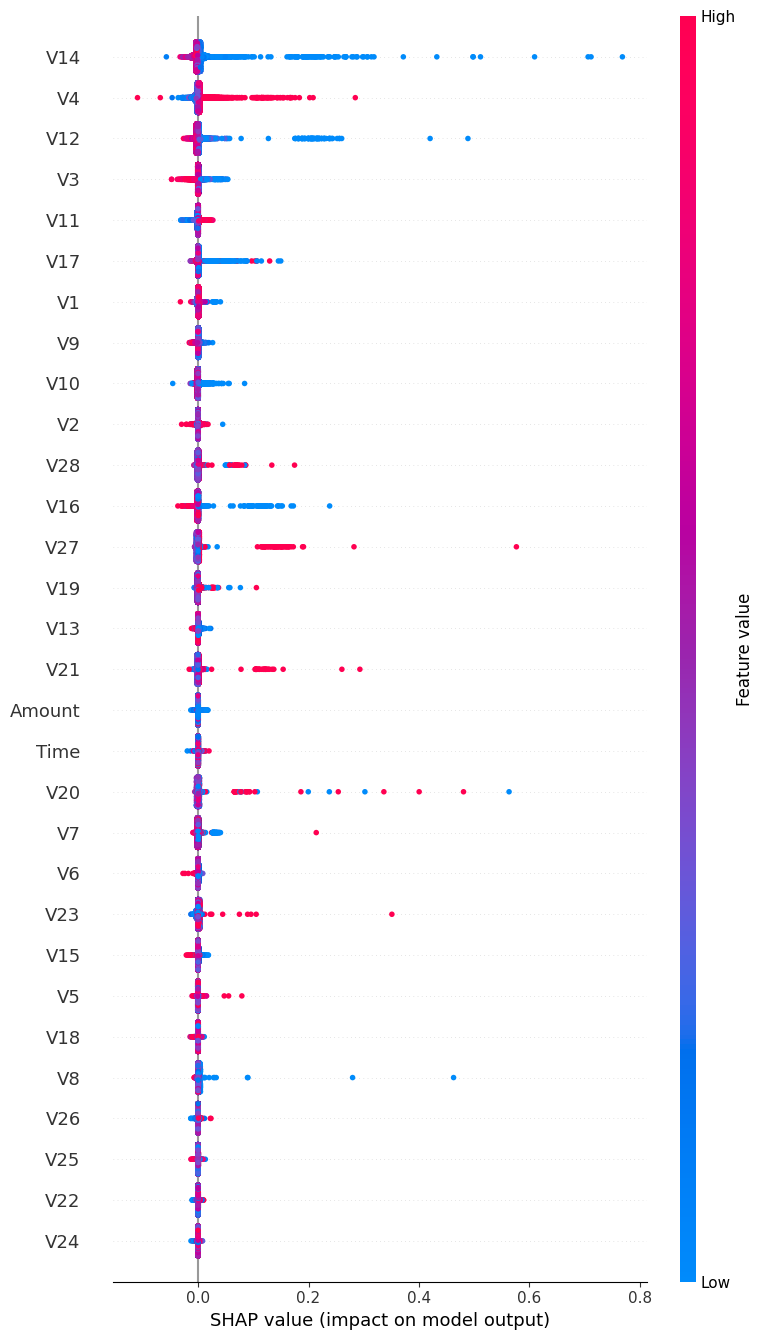

In [6]:
explainability.random_forest_SHAP()

Test shape: (30223, 11)


 99%|===================| 29907/30223 [01:10<00:00]        

SHAP values shape: (30223, 11)
Feature row shape: (11,)

SHAP summary saved to ..\insights\explainalbility\summary_xgb.png


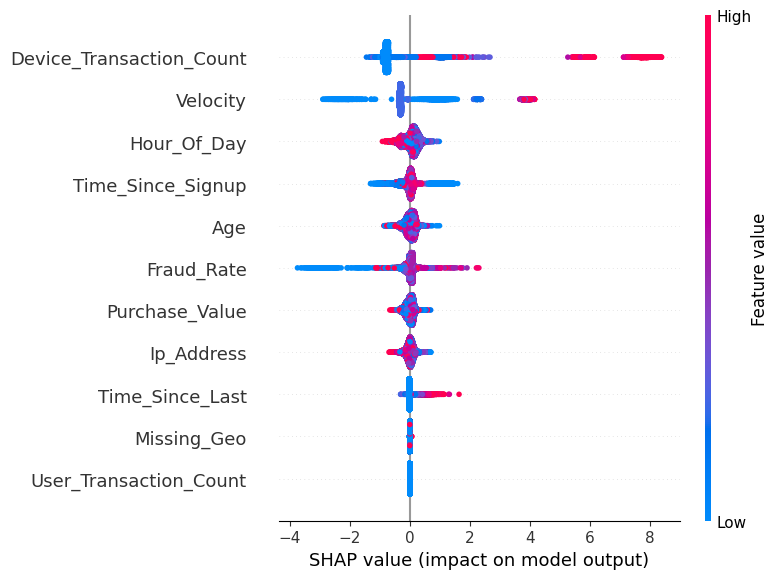

In [7]:
explainability.xgboost_SHAP()